In [10]:
import pandas as pd

# URL del conjunto de datos
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"

# Nombres de las columnas
column_names = [
    "Sample code number", "Clump Thickness", "Uniformity of Cell Size", 
    "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", 
    "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"
]

# Cargar el conjunto de datos en un DataFrame de pandas
df = pd.read_csv(url, names=column_names, na_values="?")

# Mostrar las primeras filas del DataFrame
print(df.head())

   Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

   Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0          1.0                3                1       

Realiza un conteo de los datos faltantes por variable.

In [11]:
count = df.isna().sum().sum()
print("There are {} missing values".format(count))

There are 16 missing values


In [12]:

# Eliminar filas con al menos un valor faltante
df_dropna = df.dropna()
print("Shape después de eliminar filas con al menos un valor faltante:", df_dropna.shape)

# Eliminar las columnas con al menos un valor faltante
df_dropna_columns = df.dropna(axis=1)
print("Shape después de eliminar columnas con al menos un valor faltante:", df_dropna_columns.shape)

# Consideraciones:
# - Evalúa si perder ciertas filas o columnas afectará significativamente el análisis posterior.
# - Considera el contexto del dataset y la importancia de preservar la mayor cantidad de datos.


Shape después de eliminar filas con al menos un valor faltante: (683, 11)
Shape después de eliminar columnas con al menos un valor faltante: (699, 10)


Imputaciones

In [13]:
# Univariante
from sklearn.impute import SimpleImputer
import numpy as np

# Imputación por la media
imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df_mean = pd.DataFrame(imputer_mean.fit_transform(df), columns=df.columns)

# Multivariante
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Imputación Iterativa
imputer_iterative = IterativeImputer(max_iter=10, random_state=0)
df_iterative = pd.DataFrame(imputer_iterative.fit_transform(df), columns=df.columns)

# Imputación kNN
from sklearn.impute import KNNImputer
imputer_knn = KNNImputer(n_neighbors=5)
df_knn = pd.DataFrame(imputer_knn.fit_transform(df), columns=df.columns)

Compara los resultados de la imputaciones y estrategias en un histograma o grafico de densisdad 

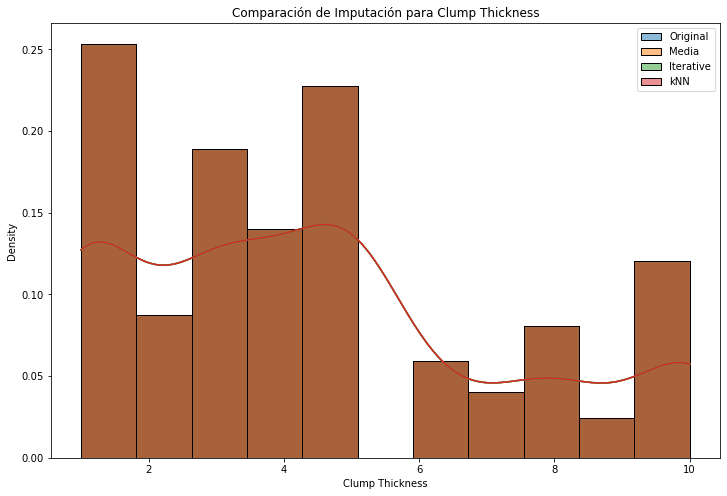

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecciona una columna para comparar, por ejemplo, "Clump Thickness"
column = "Clump Thickness"

# Histogramas
plt.figure(figsize=(12, 8))
sns.histplot(df[column], kde=True, stat="density", label="Original")
sns.histplot(df_mean[column], kde=True, stat="density", label="Media")
sns.histplot(df_iterative[column], kde=True, stat="density", label="Iterative")
sns.histplot(df_knn[column], kde=True, stat="density", label="kNN")
plt.title(f'Comparación de Imputación para {column}')
plt.legend()
plt.show()
